In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_dir = '/content/churn-bigml-80.csv'

data_unprocessed = pd.read_csv(data_dir)

# EDA?

In [ ]:
data_unprocessed.head(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False
9,RI,74,415,No,No,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,False


In [ ]:
data_unprocessed.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
data_unprocessed.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

<Axes: xlabel='Churn', ylabel='Probability'>

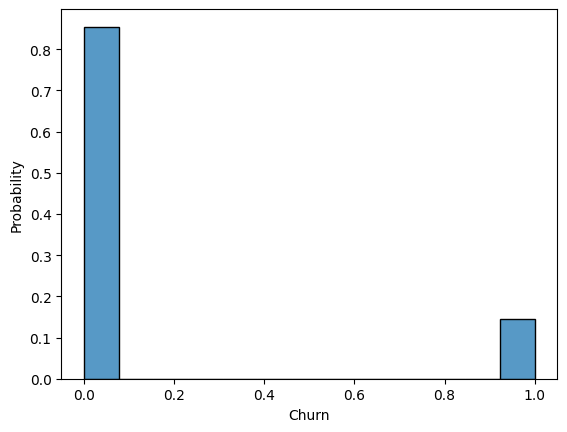

In [ ]:
sns.histplot(data_unprocessed['Churn'],stat = 'probability')

In [ ]:
data_unprocessed['Churn'].value_counts()

Churn
False    2278
True      388
Name: count, dtype: int64

In [ ]:
data = data_unprocessed

# SURVIVAL ANALYSIS

In [ ]:
!pip install lifelines

In [ ]:
import lifelines
import matplotlib.pyplot as plt

#KAPLAN MEIER

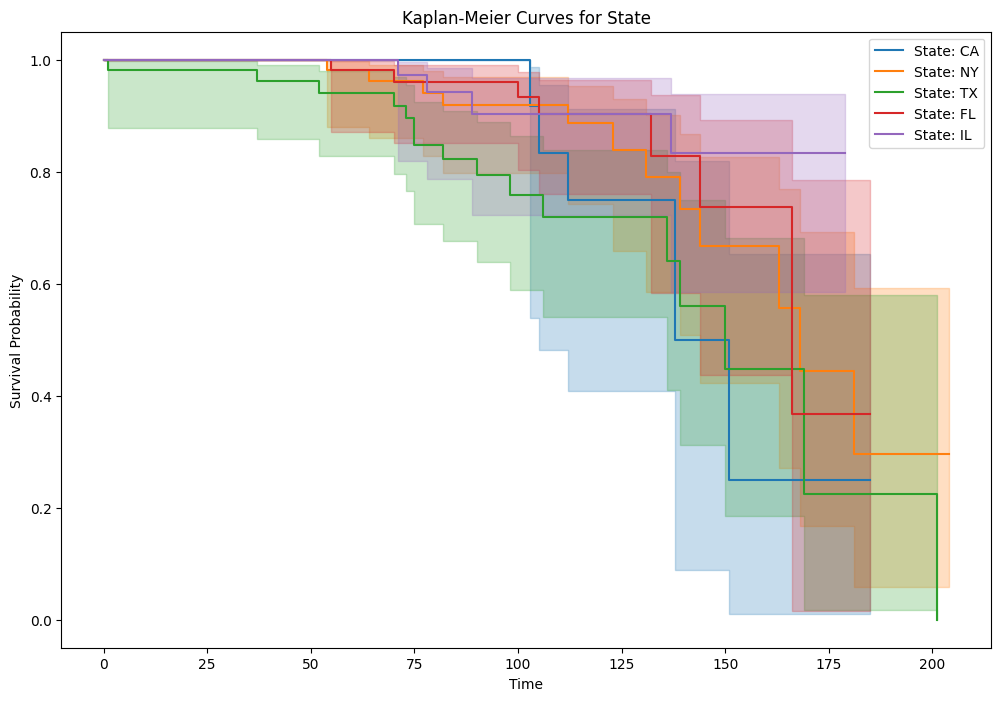

Log-rank test results for selected states:
       test_statistic         p  -log2(p)
CA FL        1.472315  0.224981  2.152127
   IL        2.199716  0.138036  2.856882
   NY        0.463997  0.495762  1.012281
   TX        0.530570  0.466367  1.100461
FL IL        0.290906  0.589640  0.762093
   NY        0.278762  0.597514  0.742957
   TX        4.834262  0.027900  5.163613
IL NY        1.125854  0.288661  1.792550
   TX        6.121128  0.013358  6.226201
NY TX        3.390437  0.065576  3.930698

Multiple log-rank test results for selected states (with multiple test correction):
  level_0 level_1  test_statistic         p  -log2(p)  corrected_p_value  \
0      CA      FL        1.472315  0.224981  2.152127           1.000000   
1      CA      IL        2.199716  0.138036  2.856882           1.000000   
2      CA      NY        0.463997  0.495762  1.012281           1.000000   
3      CA      TX        0.530570  0.466367  1.100461           1.000000   
4      FL      IL        0.290

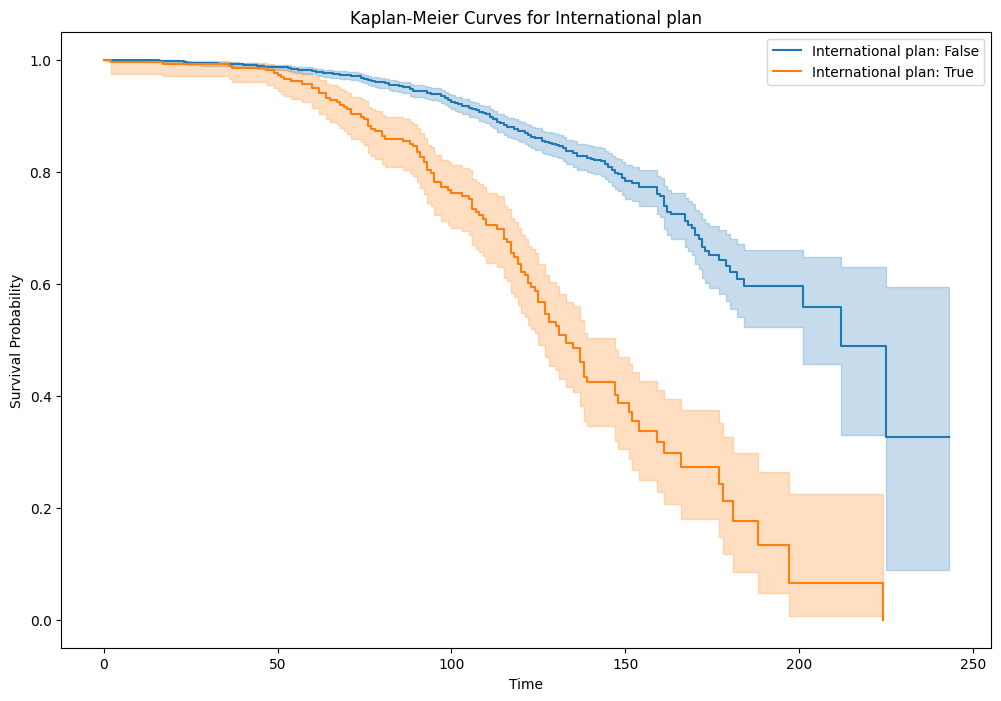


Log-rank test results for International plan:
            test_statistic             p    -log2(p)
False True       160.46639  8.948465e-37  119.749699


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import pairwise_logrank_test
from statsmodels.stats.multitest import multipletests

# List of relevant columns
RELEVANT_COLUMNS = [
    'Number vmail messages', 'Total intl minutes', 'Total day minutes',
    'Voice mail plan', 'International plan', 'Total intl calls',
    'Customer service calls', 'Total eve minutes', 'Time', 'Churn',
    'State'
]

def plot_kaplan_meier_curve(data, time_column='Time', event_column='Churn', feature_column='State', categories=None):
    kmf = KaplanMeierFitter()
    plt.figure(figsize=(12, 8))

    if categories is None:
        categories = data[feature_column].unique()

    for category in categories:
        mask = data[feature_column] == category
        if mask.sum() > 0:
            kmf.fit(data.loc[mask, time_column],
                    data.loc[mask, event_column],
                    label=f"{feature_column}: {category}")
            kmf.plot()

    plt.title(f"Kaplan-Meier Curves for {feature_column}")
    plt.xlabel("Time")
    plt.ylabel("Survival Probability")
    plt.legend()
    plt.show()

def perform_logrank_test(data, time_column='Time', event_column='Churn', feature_column='State', categories=None):
    """
    Perform log-rank test and return the summary.

    Parameters:
    data (pd.DataFrame): The dataset containing survival information.
    time_column (str): Name of the column containing time-to-event data.
    event_column (str): Name of the column containing event occurrence (0 or 1).
    feature_column (str): Name of the column containing the feature to be analyzed.
    categories (list): List of categories to include in the test. If None, all categories are used.

    Returns:
    pd.DataFrame: Summary of the log-rank test results.
    """
    if categories is not None:
        data = data[data[feature_column].isin(categories)]

    log_rank_result = pairwise_logrank_test(data[time_column],
                                            data[feature_column],
                                            data[event_column])
    return log_rank_result.summary

def perform_multiple_logrank_tests(data, time_column='Time', event_column='Churn',
                                   feature_column='State', categories=None,
                                   alpha=0.05, method='bonferroni', show_all=True):
    """
    Perform multiple log-rank tests with correction for multiple comparisons.

    Parameters:
    data (pd.DataFrame): The dataset containing survival information.
    time_column (str): Name of the column containing time-to-event data.
    event_column (str): Name of the column containing event occurrence (0 or 1).
    feature_column (str): Name of the column containing the feature to be analyzed.
    categories (list): List of categories to include in the test. If None, all categories are used.
    alpha (float): Significance level for the multiple comparison correction.
    method (str): Method for multiple comparison correction (e.g., 'bonferroni').
    show_all (bool): If True, return all results; if False, return only significant results.

    Returns:
    pd.DataFrame: Summary of the log-rank test results with corrected p-values.
    """
    if categories is not None:
        data = data[data[feature_column].isin(categories)]

    log_rank_result = pairwise_logrank_test(data[time_column],
                                            data[feature_column],
                                            data[event_column])
    results = log_rank_result.summary

    # Perform multiple comparison correction
    reject, corrected_p_values, _, _ = multipletests(results['p'],
                                                     alpha=alpha,
                                                     method=method)

    results['corrected_p_value'] = corrected_p_values
    results['reject_null_hypothesis'] = reject

    if not show_all:
        results = results[results['reject_null_hypothesis']]

    return results.reset_index()

# Example usage:
# Assuming 'data' is your DataFrame and it contains the RELEVANT_COLUMNS

# Ensure data only contains relevant columns
data = data[RELEVANT_COLUMNS]

# Select states for analysis (you can modify this list)
selected_states = ['CA', 'NY', 'TX', 'FL', 'IL']  # Replace with actual state codes from your data

# Plot Kaplan-Meier curves for selected states
plot_kaplan_meier_curve(data, feature_column='State', categories=selected_states)

# Perform regular log-rank test for selected states
logrank_results = perform_logrank_test(data, feature_column='State', categories=selected_states)
print("Log-rank test results for selected states:")
print(logrank_results)

# Perform multiple log-rank tests with correction for selected states
multiple_logrank_results = perform_multiple_logrank_tests(data, feature_column='State', categories=selected_states)
print("\nMultiple log-rank test results for selected states (with multiple test correction):")
print(multiple_logrank_results)

# Example of using a boolean feature
print("\nKaplan-Meier curves for International plan:")
plot_kaplan_meier_curve(data, feature_column='International plan')

print("\nLog-rank test results for International plan:")
print(perform_logrank_test(data, feature_column='International plan'))

# COX PROP

In [ ]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
import optuna
from sklearn.model_selection import train_test_split

# Load the data
cox_data = data_unprocessed#pd.read_csv('your_main_data.csv')  # Replace with your actual data file
test_data = pd.read_csv('churn-bigml-20.csv')

# Rename 'Account length' to 'Time' in test data
test_data = test_data.rename(columns={'Account length': 'Time'})

# Preprocess the data
test_data['International plan'] = test_data['International plan'].replace({'Yes': True, 'No': False})
test_data['Voice mail plan'] = test_data['Voice mail plan'].replace({'Yes': True, 'No': False})


# Split the main data into training and validation sets
train_data, val_data = train_test_split(cox_data, test_size=0.2, random_state=42)

# Define the features to use
features = ['International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes',
            'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes',
            'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls']



def objective(trial):
    # Define hyperparameters to optimize
    penalizer = trial.suggest_float('penalizer', 1e-5, 1.0,log=True)
    l1_ratio = trial.suggest_float('l1_ratio', 0.0, 1.0)

    # Create and fit the model
    cph = CoxPHFitter(penalizer=penalizer, l1_ratio=l1_ratio)
    cph.fit(train_data[features + ['Time', 'Churn']], duration_col='Time', event_col='Churn')

    # Evaluate the model using only C-index
    c_index = cph.concordance_index_

    # We want to maximize concordance index
    return c_index

# Run Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=25,show_progress_bar=True)

# Get the best hyperparameters
best_params = study.best_params

# Train the final model with the best hyperparameters
best_model = CoxPHFitter(penalizer=best_params['penalizer'], l1_ratio=best_params['l1_ratio'])
best_model.fit(train_data[features + ['Time', 'Churn']], duration_col='Time', event_col='Churn')

# Evaluate on validation set
val_c_index = best_model.score(val_data[features + ['Time', 'Churn']], scoring_method="concordance_index")
print(f"Validation C-index: {val_c_index}")

# Evaluate on test set
test_c_index = best_model.score(test_data[features + ['Time', 'Churn']], scoring_method="concordance_index")
print(f"Test C-index: {test_c_index}")

# Print model summary
best_model.print_summary()

# Plot hazard ratios
best_model.plot()
plt.title("Hazard Ratios")
plt.tight_layout()
plt.show()

# Check assumptions
best_model.check_assumptions(train_data[features + ['Time', 'Churn']], p_value_threshold=0.05)

# Plot partial effects
best_model.plot_partial_effects_on_outcome(covariates='International plan', values=[False, True])
plt.title("Partial Effects of International Plan")
plt.tight_layout()
plt.show()

<ipython-input-174-bf55c43242e5>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['International plan'] = test_data['International plan'].replace({'Yes': True, 'No': False})
<ipython-input-174-bf55c43242e5>:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data['Voice mail plan'] = test_data['Voice mail plan'].replace({'Yes': True, 'No': False})
[I 2024-07-16 18:12:18,270] A new study created in memory with name: no-name-dc2435b3-6c48-4001-8748-20cd6a039353


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2024-07-16 18:12:23,950] Trial 0 finished with value: 0.7706931333206927 and parameters: {'penalizer': 0.014355536322754877, 'l1_ratio': 0.9958663238658813}. Best is trial 0 with value: 0.7706931333206927.
[I 2024-07-16 18:12:26,326] Trial 1 finished with value: 0.7732482056988682 and parameters: {'penalizer': 0.009967542671627378, 'l1_ratio': 0.6954793579059126}. Best is trial 1 with value: 0.7732482056988682.
[I 2024-07-16 18:12:27,243] Trial 2 finished with value: 0.7727508680096856 and parameters: {'penalizer': 0.00023978742485368998, 'l1_ratio': 0.3771482120609543}. Best is trial 1 with value: 0.7732482056988682.
[I 2024-07-16 18:12:28,200] Trial 3 finished with value: 0.7725892332607013 and parameters: {'penalizer': 0.0008806932339243892, 'l1_ratio': 0.15509376057502589}. Best is trial 1 with value: 0.7732482056988682.
[I 2024-07-16 18:12:29,092] Trial 4 finished with value: 0.772809926860276 and parameters: {'penalizer': 8.341137159187147e-05, 'l1_ratio': 0.6283426771499926}.

TypeError: 'numpy.float64' object is not callable

# ATR

In [ ]:
aft_data = cox_data

In [ ]:
from lifelines import LogLogisticAFTFitter,WeibullAFTFitter,LogNormalAFTFitter

aft_loglog = LogLogisticAFTFitter()
aft_wei = WeibullAFTFitter()
aft_lognor = LogNormalAFTFitter()

# Perform univariate Cox regression for each predictor
univariate_results_concordance_loglog = {}
univariate_results_AIC_loglog  = {}

univariate_results_concordance_wei = {}
univariate_results_AIC_wei  = {}

univariate_results_concordance_lognor = {}
univariate_results_AIC_lognor  = {}

for predictor in features:
    aft_loglog = LogLogisticAFTFitter()
    aft_wei = WeibullAFTFitter()
    aft_lognor = LogNormalAFTFitter()

    aft_loglog.fit(aft_data[[predictor, 'Time', 'Churn']], 'Time', 'Churn')
    univariate_results_concordance_loglog[predictor] = aft_loglog.concordance_index_
    univariate_results_AIC_loglog[predictor] = aft_loglog.AIC_

    aft_wei.fit(aft_data[[predictor, 'Time', 'Churn']], 'Time', 'Churn')
    univariate_results_concordance_wei[predictor] = aft_wei.concordance_index_
    univariate_results_AIC_wei[predictor] = aft_wei.AIC_

    aft_lognor.fit(aft_data[[predictor, 'Time', 'Churn']], 'Time', 'Churn')
    univariate_results_concordance_lognor[predictor] = aft_lognor.concordance_index_
    univariate_results_AIC_lognor[predictor] = aft_lognor.AIC_

# Now you can examine the results, e.g., check p-values, hazard ratios, etc.
# Based on these results, you can decide which predictors to include in your multivariate model.
sorted_aic_loglog = dict(sorted(univariate_results_AIC_loglog.items(), key=lambda item: item[1]))
print(sorted_aic_loglog)
sorted_con_loglog = dict(sorted(univariate_results_concordance_loglog.items(), key=lambda item: item[1], reverse=True))
print(sorted_con_loglog)
print('#######################################################')
sorted_aic_wei = dict(sorted(univariate_results_AIC_wei.items(), key=lambda item: item[1]))
print(sorted_aic_wei)
sorted_con_wei = dict(sorted(univariate_results_concordance_wei.items(), key=lambda item: item[1], reverse=True))
print(sorted_con_wei)
print('#######################################################')
sorted_aic_lognor = dict(sorted(univariate_results_AIC_lognor.items(), key=lambda item: item[1]))
print(sorted_aic_lognor)
sorted_con_lognor = dict(sorted(univariate_results_concordance_lognor.items(), key=lambda item: item[1], reverse=True))
print(sorted_con_lognor)
print('#######################################################')

{'International plan': 5352.09874259149, 'Total day minutes': 5378.927646655532, 'Customer service calls': 5380.559041233825, 'Voice mail plan': 5432.103920167111, 'Number vmail messages': 5438.376124464062, 'Total intl minutes': 5439.059142431279, 'Total eve minutes': 5441.898054782034, 'Total intl calls': 5442.224821209598, 'Total night minutes': 5451.2882906294935, 'Total night calls': 5453.724286017932, 'Area code': 5454.81629928996}
{'Total day minutes': 0.609574136782393, 'International plan': 0.5920496071714373, 'Customer service calls': 0.5797000469107867, 'Total intl calls': 0.5664221261230009, 'Voice mail plan': 0.5563520753095521, 'Total eve minutes': 0.5550984929417005, 'Number vmail messages': 0.5524986892574298, 'Total intl minutes': 0.5462100814828539, 'Total night minutes': 0.5389487647483178, 'Area code': 0.5192324370350806, 'Total night calls': 0.5183011199457569}
#######################################################
{'International plan': 5331.7682379623875, 'Total

In [ ]:
# Extract the keys of the top 10 elements from each sorted dictionary
top_aic = set(list(sorted_aic_loglog.keys())[:10])
top_con = set(list(sorted_con_loglog.keys())[:10])

# Add the keys from the second dictionary to the set containing the keys from the first dictionary
top_aic.update(top_con)
top_aic

{'Area code',
 'Customer service calls',
 'International plan',
 'Number vmail messages',
 'Total day minutes',
 'Total eve minutes',
 'Total intl calls',
 'Total intl minutes',
 'Total night calls',
 'Total night minutes',
 'Voice mail plan'}

In [ ]:
from itertools import combinations
# Sample data (replace with your data)

# List of features
features = top_aic

# Generate all possible combinations of features
all_feature_combinations = []
for r in range(1, len(features) + 1):
    all_feature_combinations.extend(combinations(features, r))

print(len(all_feature_combinations))

# Initialize variables to track the best model and its metrics
best_model = None
best_aic = float('inf')
best_c_index = float('-inf')
all_models_info = []

# Fit Cox models for each combination of features
for feature_combination in all_feature_combinations:
    # Fit Cox model
    aft_loglog = LogLogisticAFTFitter()
    aft_loglog.fit(aft_data[list(feature_combination) + ['Time', 'Churn']], duration_col='Time', event_col='Churn')

    # Calculate AIC
    aic = aft_loglog.AIC_

    # Calculate C-index
    c_index = aft_loglog.concordance_index_

    # Store model information
    model_info = {
        'features': feature_combination,
        'AIC': aic,
        'C-index': c_index
    }
    all_models_info.append(model_info)

    # Update best model
    if aic < best_aic:
        best_aic = aic
        best_model = aft_loglog
    if c_index > best_c_index:
        best_c_index = c_index

# Print best model and its metrics
print("Best Model:")
print(best_model.summary)
print("Best AIC:", best_aic)
print("Best C-index:", best_c_index)



2047
Best Model:
                                   coef   exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                                
alpha_ Customer service calls -0.176672    0.838055  0.017863       -0.211682   
       International plan     -0.489425    0.612979  0.049767       -0.586967   
       Number vmail messages  -0.167789    0.845532  0.089698       -0.343594   
       Total day minutes      -0.003208    0.996797  0.000371       -0.003935   
       Total eve minutes      -0.074233    0.928455  0.019994       -0.113421   
       Total intl calls        0.074225    1.077049  0.021870        0.031360   
       Total intl minutes     -0.066810    0.935373  0.020157       -0.106318   
       Total night minutes    -0.042639    0.958258  0.020042       -0.081920   
       Voice mail plan         0.616018    1.851541  0.211234        0.202008   
       Intercept               5.927435  375.190906  0.101721        5.728066   
beta_  Inte

<Axes: xlabel='log(accelerated failure rate) (95% CI)'>

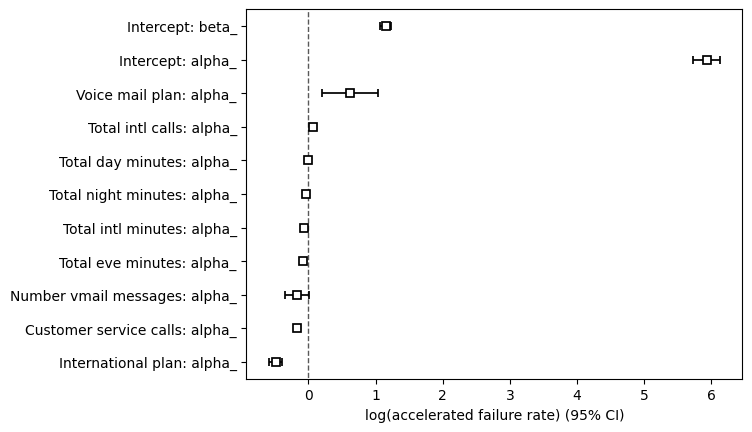

In [ ]:
best_model.plot()

# CUSTOMER LIFETIME VALUE

In [ ]:
cox_data[cox_data['Churn']==True].sort_values(by='Time')

,State,Time,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2377,TX,1,415,False,False,-0.589414,182.1,0.284712,0.048578,-1.285505,0.296481,-1.284759,-0.962540,-1.293144,-0.964108,-0.085020,-0.597527,-0.085681,2.621957,True
1040,DE,2,415,True,False,-0.589414,132.1,-2.917784,-0.873931,-1.206985,-0.596479,-1.206238,-0.168777,0.973166,-0.167502,-0.407853,-1.411947,-0.404546,0.333610,True
28,AZ,12,408,False,False,-0.589414,249.6,0.885180,1.293422,1.021041,0.941397,1.020064,1.556624,-0.520538,1.557021,0.560644,-0.597527,0.565334,-0.429172,True
1780,MS,13,415,False,False,-0.589414,303.2,1.635765,2.282134,-0.586671,-0.695697,-0.587308,0.520596,-1.035609,0.519681,0.453033,-0.597527,0.459045,-1.191955,True
321,WI,16,510,False,False,-0.589414,229.6,-1.116380,0.924418,0.104312,0.395699,0.103215,-0.688761,-0.469031,-0.688360,0.201942,-1.004737,0.206611,-1.191955,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,AL,197,415,True,False,-0.589414,127.3,-1.016302,-0.962926,0.430173,0.742962,0.431156,-0.537099,-0.263003,-0.535166,1.242179,0.216894,1.242921,2.621957,True
2542,TX,201,415,False,False,-0.589414,225.9,0.484868,0.856044,1.937771,-0.695697,1.936912,0.987399,-0.984102,0.988016,0.345423,-0.190317,0.339471,-0.429172,True
1722,SC,212,415,False,False,-0.589414,226.0,1.335531,0.858215,2.045737,-0.844524,2.045455,-0.393316,1.642758,-0.395104,0.847606,-0.190317,0.844340,0.333610,True
338,DE,224,510,True,False,-0.589414,171.5,-0.065561,-0.146777,-0.792788,0.147654,-0.792848,0.221211,0.097547,0.222048,-1.878533,-1.004737,-1.879294,-0.429172,True


In [ ]:
cox_data[321:322]

,State,Time,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
321,WI,16,510,False,False,-0.589414,229.6,-1.11638,0.924418,0.104312,0.395699,0.103215,-0.688761,-0.469031,-0.68836,0.201942,-1.004737,0.206611,-1.191955,True


In [ ]:
aft_model = best_model

In [ ]:
import pickle
with open('best_aft_model.pkl', 'wb') as file:
    pickle.dump(aft_model, file)

print("Model saved successfully.")

Model saved successfully.


In [ ]:
with open('best_aft_model.pkl', 'rb') as file:
    loaded_aft_model = pickle.load(file)

print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
loaded_aft_model.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 2666 total observations, 2278 right-censored observations>
             duration col = 'Time'
                event col = 'Churn'
   number of observations = 2666
number of events observed = 388
           log-likelihood = -2553.56
         time fit was run = 2024-07-16 16:18:56 UTC

---
                               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                               
alpha_ Customer service calls -0.18      0.84      0.02           -0.21           -0.14                0.81                0.87
       International plan     -0.49      0.61      0.05           -0.59           -0.39                0.56                0.68
       Number vmail messages  -0.17      0.85      0.09           -0.34            0.01                0.71                1.01
       Total day minutes      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
       Total eve minutes      -0.07      0.93      0.02           -0.11           -0.04                0.89                0.97
       Total intl calls        0.07      1.08      0.02            0.03            0.12                1.03                1.12
       Total intl minutes     -0.07      0.94      0.02           -0.11           -0.03                0.90                0.97
       Total night minutes    -0.04      0.96      0.02           -0.08           -0.00                0.92                1.00
       Voice mail plan         0.62      1.85      0.21            0.20            1.03                1.22                2.80
       Intercept               5.93    375.19      0.10            5.73            6.13              307.37              457.97
beta_  Intercept               1.15      3.17      0.04            1.07            1.23                2.92                3.43

                               cmp to     z      p  -log2(p)
param  covariate                                            
alpha_ Customer service calls    0.00 -9.89 <0.005     74.21
       International plan        0.00 -9.83 <0.005     73.40
       Number vmail messages     0.00 -1.87   0.06      4.03
       Total day minutes         0.00 -8.65 <0.005     57.40
       Total eve minutes         0.00 -3.71 <0.005     12.25
       Total intl calls          0.00  3.39 <0.005     10.50
       Total intl minutes        0.00 -3.31 <0.005     10.09
       Total night minutes       0.00 -2.13   0.03      4.90
       Voice mail plan           0.00  2.92 <0.005      8.14
       Intercept                 0.00 58.27 <0.005       inf
beta_  Intercept                 0.00 27.77 <0.005    561.53
---
Concordance = 0.77
AIC = 5129.13
log-likelihood ratio test = 341.77 on 9 df
-log2(p) of ll-ratio test = 224.09

In [ ]:
best_model.print_summary()

<lifelines.LogLogisticAFTFitter: fitted with 2666 total observations, 2278 right-censored observations>
             duration col = 'Time'
                event col = 'Churn'
   number of observations = 2666
number of events observed = 388
           log-likelihood = -2553.56
         time fit was run = 2024-07-16 16:18:56 UTC

---
                               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param  covariate                                                                                                               
alpha_ Customer service calls -0.18      0.84      0.02           -0.21           -0.14                0.81                0.87
       International plan     -0.49      0.61      0.05           -0.59           -0.39                0.56                0.68
       Number vmail messages  -0.17      0.85      0.09           -0.34            0.01                0.71                1.01
       Total day minutes      -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
       Total eve minutes      -0.07      0.93      0.02           -0.11           -0.04                0.89                0.97
       Total intl calls        0.07      1.08      0.02            0.03            0.12                1.03                1.12
       Total intl minutes     -0.07      0.94      0.02           -0.11           -0.03                0.90                0.97
       Total night minutes    -0.04      0.96      0.02           -0.08           -0.00                0.92                1.00
       Voice mail plan         0.62      1.85      0.21            0.20            1.03                1.22                2.80
       Intercept               5.93    375.19      0.10            5.73            6.13              307.37              457.97
beta_  Intercept               1.15      3.17      0.04            1.07            1.23                2.92                3.43

                               cmp to     z      p  -log2(p)
param  covariate                                            
alpha_ Customer service calls    0.00 -9.89 <0.005     74.21
       International plan        0.00 -9.83 <0.005     73.40
       Number vmail messages     0.00 -1.87   0.06      4.03
       Total day minutes         0.00 -8.65 <0.005     57.40
       Total eve minutes         0.00 -3.71 <0.005     12.25
       Total intl calls          0.00  3.39 <0.005     10.50
       Total intl minutes        0.00 -3.31 <0.005     10.09
       Total night minutes       0.00 -2.13   0.03      4.90
       Voice mail plan           0.00  2.92 <0.005      8.14
       Intercept                 0.00 58.27 <0.005       inf
beta_  Intercept                 0.00 27.77 <0.005    561.53
---
Concordance = 0.77
AIC = 5129.13
log-likelihood ratio test = 341.77 on 9 df
-log2(p) of ll-ratio test = 224.09

In [ ]:
subjects = cox_data[169:170]
subjects

,State,Time,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
169,MO,66,415,False,True,2.055754,106.7,-1.216458,-1.342783,0.184795,-1.142178,0.184046,-0.212109,0.870152,-0.211271,0.668255,-1.004737,0.671622,-0.429172,False


In [ ]:
a =aft_model.predict_survival_function(subjects,range(30,390,30))
a

,169
30.0,0.997697
60.0,0.979702
90.0,0.930406
120.0,0.843178
150.0,0.726221
180.0,0.598268
210.0,0.477558
240.0,0.374579
270.0,0.292028
300.0,0.228085


In [ ]:

def calculate_cost(row):
  base_cost = 30
  if row['Voice mail plan']:
    base_cost += 5
  if row['International plan']:
    base_cost += 15
  return base_cost

subjects['Cost'] = subjects.apply(calculate_cost, axis=1)

subjects

,State,Time,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Cost
341,NM,141,415,False,True,1.467939,206.9,1.285492,0.505491,1.256603,...,1.255627,-0.578461,1.230702,-0.578936,-0.336112,2.660155,-0.338116,0.33361,False,35


In [ ]:
def calculate_monthly_ltv(cost_df, surv_prop_df):
    """
    Calculates monthly LTV given cost and survival probabilities.

    Args:
        cost_df: DataFrame with a single row and a "Cost" column.
        surv_prop_df: DataFrame with survival probabilities, indexed by time period (e.g., months).

    Returns:
        DataFrame with monthly LTV values.
    """
    # Calculate LTV for each time period
    ltv_df = surv_prop_df.copy()
    ltv_df['LTV'] = ltv_df.apply(lambda row: cost_df['Cost'].iloc[0] * row.iloc[0], axis=1)

    return ltv_df

In [ ]:
ltv_df = calculate_monthly_ltv(subjects,a)

In [ ]:
ltv_df

,169,LTV
30.0,0.997697,44.896386
60.0,0.979702,44.086612
90.0,0.930406,41.868264
120.0,0.843178,37.942989
150.0,0.726221,32.679931
180.0,0.598268,26.922056
210.0,0.477558,21.490108
240.0,0.374579,16.856034
270.0,0.292028,13.141244
300.0,0.228085,10.263827


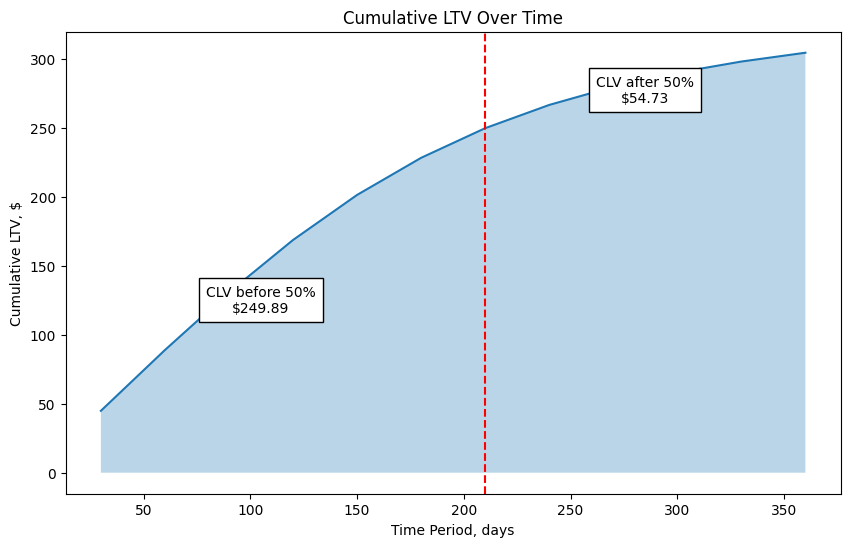

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'ltv_df' is your DataFrame with 'LTV' column and time index
ltv_df['Cumulative LTV'] = ltv_df['LTV'].cumsum()

# Plot cumulative LTV using Seaborn with filled area
plt.figure(figsize=(10, 6))
sns.lineplot(x=ltv_df.index, y=ltv_df['Cumulative LTV'])
plt.fill_between(ltv_df.index, ltv_df['Cumulative LTV'], alpha=0.3)

plt.xlabel('Time Period, days')
plt.ylabel('Cumulative LTV, $')
plt.title('Cumulative LTV Over Time')

# Find time point where survival probability is closest to 50%
closest_index = (ltv_df.iloc[:, 0] - 0.5).abs().idxmin()
ltv_at_50 = ltv_df.loc[closest_index, 'Cumulative LTV']

# Draw vertical line
plt.axvline(x=closest_index, color='red', linestyle='--')

# Calculate CLV before and after 50% survival
clv_before_50 = ltv_df.loc[closest_index, 'Cumulative LTV']
clv_after_50 = ltv_df['Cumulative LTV'].iloc[-1] - clv_before_50

# Annotate CLV values on the shaded area with better positioning and formatting
plt.text(
    x=closest_index / 2,
    y=clv_before_50 / 2,
    s=f"CLV before 50%\n${clv_before_50:.2f}",  # Add newline and $ sign
    ha='center', va='center',
    fontsize=10, color='black',  # Change text color for contrast
    bbox=dict(facecolor='white', edgecolor='black', pad=5)  # Add outline
)

plt.text(
    x=(closest_index + ltv_df.index[-1]) / 2,  # Corrected x-coordinate calculation
    y=clv_before_50 + clv_after_50 / 2,
    s=f"CLV after 50%\n${clv_after_50:.2f}",  # Add newline and $ sign
    ha='center', va='center',
    fontsize=10, color='black',  # Change text color for contrast
    bbox=dict(facecolor='white', edgecolor='black', pad=5)  # Add outline
)

plt.show()

SCENARIOS

Original subject configuration: {'Voice mail plan': False, 'International plan': False}


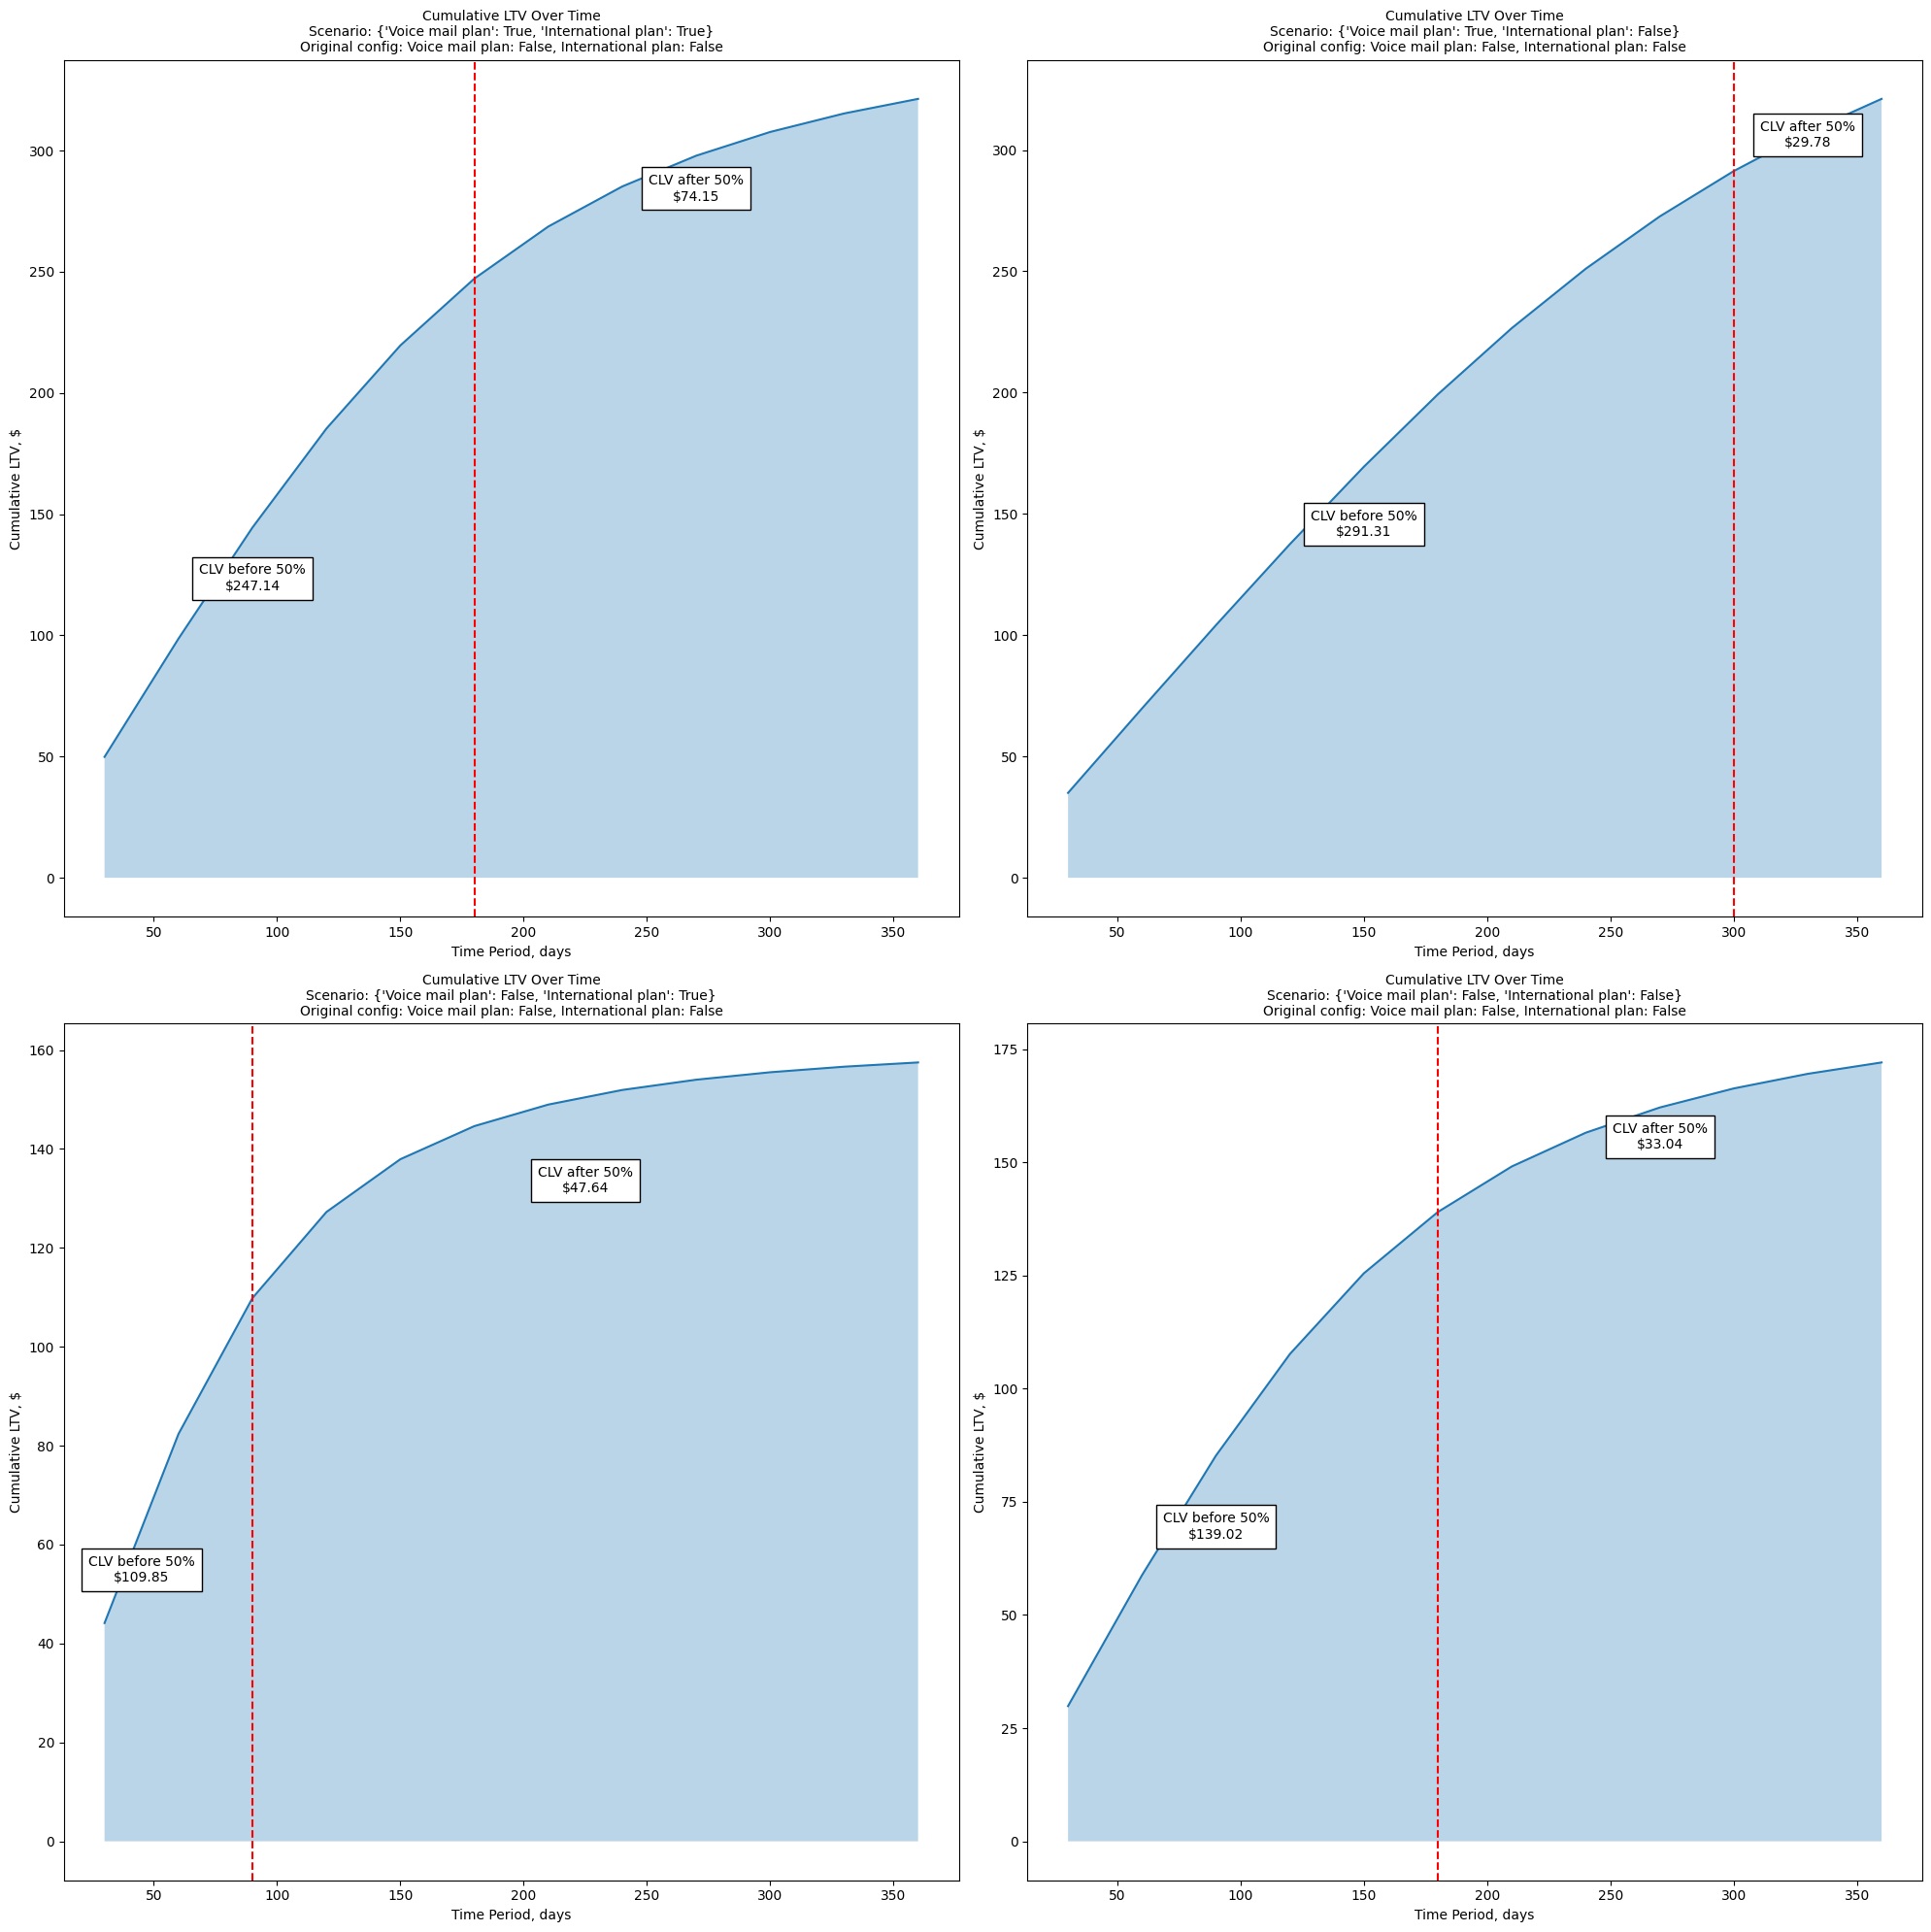

In [ ]:
def plot_cum_ltv(ltv_df, ax, scenario, original_config):
    # Assuming 'ltv_df' is your DataFrame with 'LTV' column and time index
    ltv_df['Cumulative LTV'] = ltv_df['LTV'].cumsum()

    # Plot cumulative LTV using Seaborn with filled area
    sns.lineplot(x=ltv_df.index, y=ltv_df['Cumulative LTV'], ax=ax)
    ax.fill_between(ltv_df.index, ltv_df['Cumulative LTV'], alpha=0.3)

    ax.set_xlabel('Time Period, days')
    ax.set_ylabel('Cumulative LTV, $')

    # Create a more detailed title including the original configuration
    title = f'Cumulative LTV Over Time\nScenario: {scenario}\n'
    title += f'Original config: Voice mail plan: {original_config["Voice mail plan"]}, '
    title += f'International plan: {original_config["International plan"]}'
    ax.set_title(title, fontsize=10)

    # Find time point where survival probability is closest to 50%
    closest_index = (ltv_df.iloc[:, 0] - 0.5).abs().idxmin()
    ltv_at_50 = ltv_df.loc[closest_index, 'Cumulative LTV']

    # Draw vertical line
    ax.axvline(x=closest_index, color='red', linestyle='--')

    # Calculate CLV before and after 50% survival
    clv_before_50 = ltv_df.loc[closest_index, 'Cumulative LTV']
    clv_after_50 = ltv_df['Cumulative LTV'].iloc[-1] - clv_before_50

    # Annotate CLV values on the shaded area with better positioning and formatting
    ax.text(
        x=closest_index / 2,
        y=clv_before_50 / 2,
        s=f"CLV before 50%\n${clv_before_50:.2f}",
        ha='center', va='center',
        fontsize=10, color='black',
        bbox=dict(facecolor='white', edgecolor='black', pad=5)
    )

    ax.text(
        x=(closest_index + ltv_df.index[-1]) / 2,
        y=clv_before_50 + clv_after_50 / 2,
        s=f"CLV after 50%\n${clv_after_50:.2f}",
        ha='center', va='center',
        fontsize=10, color='black',
        bbox=dict(facecolor='white', edgecolor='black', pad=5)
    )

# Assuming 'cox_data' and 'aft_model' are defined
subjects = cox_data[12:13].copy()  # Select subject(s)

# Calculate cost for the subject(s)
subjects['Cost'] = subjects.apply(calculate_cost, axis=1)

# Store the original plan configuration
original_config = {
    'Voice mail plan': subjects['Voice mail plan'].iloc[0],
    'International plan': subjects['International plan'].iloc[0]
}

print(f"Original subject configuration: {original_config}")

# Calculate survival probabilities for different scenarios
scenarios = [
    {'Voice mail plan': True, 'International plan': True},
    {'Voice mail plan': True, 'International plan': False},
    {'Voice mail plan': False, 'International plan': True},
    {'Voice mail plan': False, 'International plan': False}
]

# Create a 2x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs = axs.flatten()  # Flatten the 2D array of axes for easier indexing

for i, scenario in enumerate(scenarios):
    # Modify subject data for the scenario
    scenario_subject = subjects.copy()
    for feature, value in scenario.items():
        scenario_subject[feature] = value

    # Calculate cost for the scenario
    scenario_subject['Cost'] = scenario_subject.apply(calculate_cost, axis=1)

    # Predict survival probabilities for the scenario
    survival_probabilities = aft_model.predict_survival_function(scenario_subject, range(30, 390, 30))

    # Calculate LTV for the scenario
    ltv_df = calculate_monthly_ltv(scenario_subject[['Cost']], survival_probabilities)

    # Print LTV for the scenario
    # print(f"LTV for scenario {scenario}:")
    plot_cum_ltv(ltv_df, axs[i], scenario, original_config)
    # print(ltv_df)

plt.tight_layout()
plt.show()

